In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# And_Gate
and_data = torch.tensor([ [0, 0],
                          [0, 1],
                          [1, 0],
                          [1, 1] ], dtype=torch.float32)
and_labels = torch.tensor([ [0],
                            [0],
                            [0],
                            [1] ], dtype=torch.float32)

In [3]:
# OR_Gate
or_data = torch.tensor([ [0, 0],
                         [0, 1],
                         [1, 0],
                         [1, 1] ], dtype=torch.float32)
or_labels = torch.tensor([ [0],
                           [1],
                           [1],
                           [1] ], dtype=torch.float32)

In [4]:
import numpy as np

np.random.rand(32, 32).shape

(32, 32)

In [5]:
import torch.nn as nn

l1 = nn.Linear(2, 1)
x = l1(and_data)
# torch.sigmoid(x) # 0.5 에 가까운 값
# torch.relu(x) # 0보타 큰값은 0으로 가까운 값
print(x.shape)

act_fn = nn.Sigmoid()
act_fn(x)

torch.Size([4, 1])


tensor([[0.4541],
        [0.5683],
        [0.3848],
        [0.4975]], grad_fn=<SigmoidBackward0>)

In [6]:
l1.weight, l1.bias, l1.parameters # Lindear 객체

(Parameter containing:
 tensor([[-0.2852,  0.4591]], requires_grad=True),
 Parameter containing:
 tensor([-0.1840], requires_grad=True),
 <bound method Module.parameters of Linear(in_features=2, out_features=1, bias=True)>)

In [7]:
# perceptron 퍼셉트론
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 1)
        # self.fc1 = nn.Linear(2, 10)
        self.sigmoid = nn.Sigmoid()
        #self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        # x = torch.view(x, -1) # 이미지 데이터를 일자로 늘림
        x = self.fc1(x)
        x = self.sigmoid(x)
        # x = torch.sigmoid(x)
        #x = torch.sigmoid(self.fc2(x))
        return x

In [8]:
model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [9]:
model(and_data)

tensor([[0.4973],
        [0.3426],
        [0.4120],
        [0.2695]], grad_fn=<SigmoidBackward0>)

In [10]:
# criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()

In [11]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [12]:
model = SimpleNN()

In [13]:
# tf.fit(model, data, loss_fn, optimizer, epoches=100) # 텐서플로우

In [14]:
# loss_fn = nn.BCELoss()
loss_fn = nn.CrossEntropyLoss() # 확률로 결과가 나옴
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1): # 파이 토치
    optimizer.zero_grad()
    outputs = model(and_data) # 바뀐 weight 값이 계속 반복
    loss = loss_fn(outputs, and_labels)
    print('loss', loss)
    loss.backward() # 미분
    optimizer.step() # 반대방향

loss tensor(-0., grad_fn=<DivBackward1>)


In [15]:
model(and_data)

tensor([[0.4035],
        [0.4408],
        [0.3433],
        [0.3785]], grad_fn=<SigmoidBackward0>)

In [16]:
# def and_gate(x1, x2):
#     return x1 and x2

NameError: name 'x3' is not defined

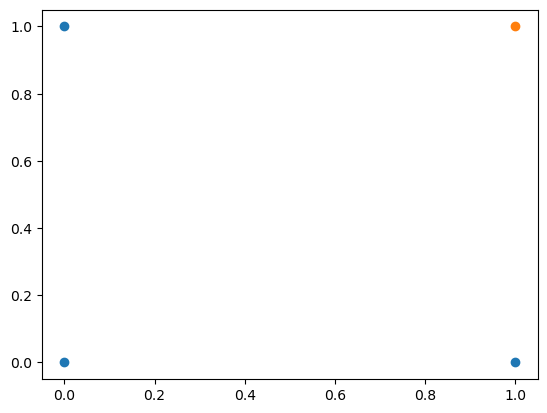

In [17]:
import matplotlib.pyplot as plt

x1 = [0, 0, 1]
y1 = [0, 1, 0]
x2 = [1]
y2 = [1]

fig, ax = plt.subplots()

ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.plot(x3, y3)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)